In [159]:
### Hyperparams
batch_size = 1

In [160]:
from torch.utils.data import Dataset
import pandas as pd
from skimage import io
import os

class GZ2Dataset(Dataset):
    def __init__(self, csv_file_maps, csv_file_data, root_dir, transform=None):
        self.maps = pd.read_csv(csv_file_maps)
        self.data = pd.read_csv(csv_file_data)
        self.root_dir = root_dir
        self.transform = transform

        self.files = os.listdir(root_dir)
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.files[index])#str(self.maps.iloc[index,2]) + '.jpg')
        image = io.imread(img_path)
        
        dr7objid = self.maps.loc[self.maps['asset_id'] == int(self.files[index][:-4])]['objid'].values[0]

        image_data = self.data.loc[self.data['dr7objid'] == dr7objid]

        if len(image_data) == 0:
            print('Shit', dr7objid)

        if self.transform:
            image = self.transform(image)

        output = [image]
        output.extend(image_data.values[0].tolist())

        return tuple(output)

In [161]:
from torchvision import transforms
from torch.utils.data import random_split

transform = transforms.Compose([transforms.ToTensor()])

dataset = GZ2Dataset(csv_file_maps='gz2_filename_mapping.csv', csv_file_data='zoo2MainSpecz.csv', root_dir='images_gz2/images/', transform=transform)

trainset, testset = random_split(dataset, [round(0.8*len(dataset)), round(0.2*len(dataset))])

In [162]:
from torch.utils.data import DataLoader

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=True)

In [171]:
element = next(iter(trainloader))
image = element[0]
data = element[1:]

[tensor([2.4985e+18], dtype=torch.float64), tensor([1.2377e+18], dtype=torch.float64), tensor([587741708882608246]), tensor([174.2313], dtype=torch.float64), tensor([27.0641], dtype=torch.float64), ('11:36:55.52',), ('+27:03:50.6',), ('original',), ('Er',), tensor([44]), tensor([136]), tensor([41]), tensor([41.], dtype=torch.float64), tensor([0.9320], dtype=torch.float64), tensor([0.9420], dtype=torch.float64), tensor([0.7170], dtype=torch.float64), tensor([0]), tensor([2]), tensor([2.], dtype=torch.float64), tensor([0.0450], dtype=torch.float64), tensor([0.0460], dtype=torch.float64), tensor([0.4224], dtype=torch.float64), tensor([0]), tensor([1]), tensor([0.5230], dtype=torch.float64), tensor([0.0230], dtype=torch.float64), tensor([0.0120], dtype=torch.float64), tensor([0.0099], dtype=torch.float64), tensor([0]), tensor([0]), tensor([0.], dtype=torch.float64), tensor([0.], dtype=torch.float64), tensor([0.], dtype=torch.float64), tensor([0.], dtype=torch.float64), tensor([0]), tensor(

In [173]:
print(int(data[0].item()))

2498505822846347264


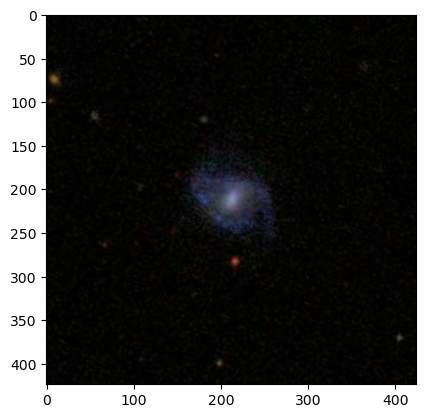

In [170]:
import matplotlib.pyplot as plt

plt.imshow(image[0].permute(1,2,0).numpy())